# Part A

In [1]:
import pandas
from datetime import datetime as dt
import numpy
import datetime
import os
import matplotlib.pyplot as plt
import seaborn
% matplotlib inline

In [2]:
## read csv files
airlines = pandas.read_csv(os.path.join(os.getcwd(),'airlines.csv'))
airports = pandas.read_csv(os.path.join(os.getcwd(),'airports.csv'))
flights = pandas.read_csv(os.path.join(os.getcwd(),'flights.csv'))
planes = pandas.read_csv(os.path.join(os.getcwd(),'planes.csv'))
weather = pandas.read_csv(os.path.join(os.getcwd(),'weather.csv'))

## i. Print out the number of rows in each of the five files.

In [3]:
print('Airlines file has',airlines.shape[0],'lines')
print('Airports file has',airports.shape[0],'lines')
print('Flights file has',flights.shape[0],'lines')
print('Planes file has',planes.shape[0],'lines')
print('Weather file has',weather.shape[0],'lines')

Airlines file has 16 lines
Airports file has 1458 lines
Flights file has 336776 lines
Planes file has 3322 lines
Weather file has 26130 lines


## ii. Means and standard deviations of inter-arrival times for the top five busiest airports (in terms of highest average number of flights arrived per day) in the list provided

In [4]:
#add a colum 'arr_dt' that contains the datetime of the arrival time
flight_df = pandas.DataFrame(flights)
flight_df['arr_time'] = flight_df['arr_time'].dropna()
flight_df['hour'] = flight_df['arr_time']//100
flight_df['minute'] = flight_df['arr_time']%100
flight_df['arr_dt'] = pandas.to_datetime(flight_df[['year','month','day','hour','minute']])

In [5]:
#calculate the average flights by airport and select top 5
flight_groupby = flight_df.groupby(['year','month','day','dest'])['arr_time']
flight_count = flight_groupby.count().reset_index()
flight_count.columns = ['year','month','day','dest','flights']
flight_count = flight_count.groupby(['dest'])['flights']
top5_busy = flight_count.mean().reset_index().sort_values(by = 'flights',ascending = 0).iloc[:5]
top5_busy_list = list(top5_busy['dest'])
print(top5_busy)

   dest    flights
4   ATL  46.227397
69  ORD  45.498630
49  LAX  43.994521
11  BOS  41.172603
54  MCO  38.298630


In [6]:
#calculate the mean inter-arrival time of the top 5 airports
flight_df_sorted = flight_df[['arr_dt','dest']].dropna()
flight_df_sorted2 = flight_df_sorted[flight_df_sorted['dest'].isin(top5_busy_list)].sort_values(['dest','arr_dt'],ascending = [1,1])
flight_df_sorted2['diff'] = flight_df_sorted2['arr_dt'].diff().dt.seconds.div(60, fill_value=0)
mean = flight_df_sorted2.groupby('dest').mean().reset_index()
mean.columns = ['dest','mean']
std = flight_df_sorted2.groupby('dest').std().reset_index()
std.columns = ['dest','std']
result1 = pandas.merge(mean, std, left_on = 'dest', right_on = 'dest')
print(result1)

  dest       mean        std
0  ATL  31.112843  74.787310
1  BOS  34.880689  65.739169
2  LAX  32.737888  70.795144
3  MCO  37.596180  74.367610
4  ORD  31.650027  74.118966


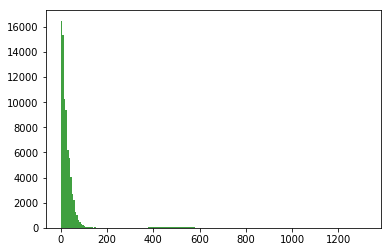

In [7]:
#display the histogram of the inter-arrval time
n, bins, patches = plt.hist(flight_df_sorted2['diff'], bins = 200, color='g', alpha=.75)

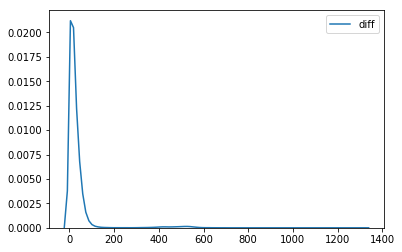

In [8]:
#display the density plot of the inter-arrval time
seaborn.kdeplot(flight_df_sorted2['diff'])